## Задание

Цель: применить на практике базовые ансамблевые методы

Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов.

 Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно.

(Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)


Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Подготовьте датасет к обучению моделей.
    -  Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
    -  *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
    - tree.DecisionTreeClassifier
    - ensemble.RandomForestClassifier
4. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
5. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.
6. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
    - Повторите п. 5
7. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
    - Повторите п. 5
8. Сформулируйте выводы по проделанной работе.
    - Сравните метрики построенных моделей.
    - Напишите свое мнение, какая модель наилучшая и почему.

Результат: получены знания по использованию базовых ансамблевых методов.

chest pain type - тип боли в груди

RestingBP  - артериальное давление в состоянии покоя

FastingBS - уровень сахара в крови натощак

ExerciseAngina -  стенокардия, вызванная физическими нагрузками

Oldpeak - Числовое значение, измеренное при депрессии

ST_Slope - наклон сегмента ST пиковой нагрузки


In [215]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import ShuffleSplit


In [8]:
data_heart = pd.read_csv('/Users/sofagusina/Desktop/программирование/machine_learning/machine_learning/ML/Работа с признаками/Ансамблирование/heart.csv')
data_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
data_heart.info()

data_heart['ExerciseAngina'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               918 non-null    int64  
 1   Sex               918 non-null    object 
 2   ChestPainType     918 non-null    object 
 3   RestingBP         918 non-null    int64  
 4   Cholesterol       918 non-null    int64  
 5   FastingBS         918 non-null    int64  
 6   RestingECG        918 non-null    object 
 7   MaxHR             918 non-null    int64  
 8   ExerciseAngina    918 non-null    object 
 9   Oldpeak           918 non-null    float64
 10  ST_Slope          918 non-null    object 
 11  HeartDisease      918 non-null    int64  
 12  RestingECG_encod  918 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 93.4+ KB


array(['N', 'Y'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

label =LabelEncoder()
label.fit(data_heart['RestingECG'])

data_heart['RestingECG_encod'] = label.transform(data_heart['RestingECG'])


array([1, 2, 0])

In [15]:
label.fit(data_heart['ExerciseAngina'])
data_heart['ExerciseAngina_encod'] = label.transform(data_heart['ExerciseAngina'])


array([0, 1])

In [18]:
label.fit(data_heart['ST_Slope'])
data_heart['ST_Slope_encod'] = label.transform(data_heart['ST_Slope'])


array([2, 1, 0])

In [20]:
label.fit(data_heart['ChestPainType'])
data_heart['ChestPainType_encod'] = label.transform(data_heart['ChestPainType'])


array([1, 2, 0, 3])

In [22]:
label.fit(data_heart['Sex'])
data_heart['Sex_encod'] = label.transform(data_heart['Sex'])

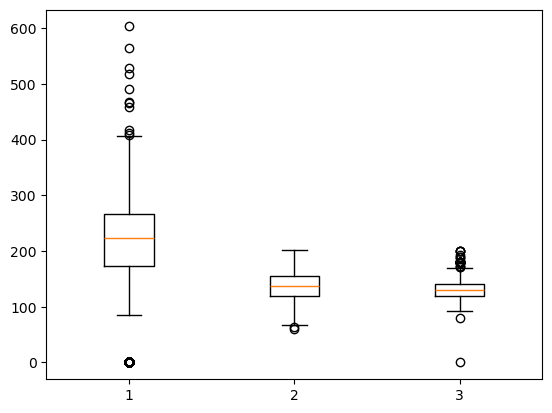

In [26]:
plt.boxplot(x=data_heart[['Cholesterol','MaxHR','RestingBP']])
plt.show()

Исходя из графиков делаем вывод, что выбросов в данных не так много. Не будет их исключать

Обучение модели

In [27]:
data_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_encod,ExerciseAngina_encod,ST_Slope_encod,ChestPainType_encod,Sex_encod
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,2,1,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,1,2,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,2,0,2,1,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,1,1,0,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0,2,2,1


In [43]:
columns_drop = ['HeartDisease'] + list(data_heart.select_dtypes('object').columns)
X = data_heart.drop(columns=columns_drop)
y = data_heart['HeartDisease']

In [48]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)



(184, 11)

## Деревья решений

In [160]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [216]:
precision_tree = precision_score(y_test,dt.predict(X_test))
recall_tree = recall_score(y_test,dt.predict(X_test))

In [218]:
print(f"Точность на обучающей выборке - {dt.score(X_train,y_train):.2f}, точность на тестовой выборке - {dt.score(X_test,y_test):.2f}")
print(f"Precision - {precision_tree:.2f},recall - {recall_tree:.2f}")

Точность на обучающей выборке - 1.00, точность на тестовой выборке - 0.80
Precision - 0.87,recall - 0.78


Деревья решений показывают среднюю точность предсказания на тестовой выборке, причем, на тренировочной выборке она высокая, что говорит о переобученности модели

## Случайный лес

Изменяя параметры алгоритма (max_samples,max_features) можно посмотреть, как меняются показатели точности

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
score = {}
for i in np.round(np.arange(0.1, 1.1, 0.1), 1):
    score[f'max_samples={i}'] = RandomForestClassifier(random_state=10,n_estimators=10,max_samples=i,max_features=i).fit(X_train,y_train)
    score[f'max_features={i}'] = RandomForestClassifier(random_state=10,n_estimators=10,max_samples=i,max_features=i).fit(X_train,y_train)
    score[f'score={i}'] = RandomForestClassifier(random_state=10,n_estimators=10,max_samples=i,max_features=i).fit(X_train,y_train).score(X_test,y_test)
    print(score[f'score={i}'],score[f'max_samples={i}'])


0.8152173913043478 RandomForestClassifier(max_features=0.1, max_samples=0.1, n_estimators=10,
                       random_state=10)
0.8641304347826086 RandomForestClassifier(max_features=0.2, max_samples=0.2, n_estimators=10,
                       random_state=10)
0.842391304347826 RandomForestClassifier(max_features=0.3, max_samples=0.3, n_estimators=10,
                       random_state=10)
0.8206521739130435 RandomForestClassifier(max_features=0.4, max_samples=0.4, n_estimators=10,
                       random_state=10)
0.875 RandomForestClassifier(max_features=0.5, max_samples=0.5, n_estimators=10,
                       random_state=10)
0.8315217391304348 RandomForestClassifier(max_features=0.6, max_samples=0.6, n_estimators=10,
                       random_state=10)
0.8804347826086957 RandomForestClassifier(max_features=0.7, max_samples=0.7, n_estimators=10,
                       random_state=10)
0.8532608695652174 RandomForestClassifier(max_features=0.8, max_samples=0.8,

Самая высокая точность наблюдается при max_samples = 0.7, max_features = 0.7 - 88%

Оценим важность признаков

In [114]:

rf = RandomForestClassifier(random_state=10,n_estimators=10,max_samples=0.7,max_features=0.7)
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.7, n_estimators=10,
                       random_state=10)

In [126]:
imp = pd.Series(rf.feature_importances_, index=X_train.columns)
imp = imp.sort_values(ascending=False)
imp

ST_Slope_encod          0.379009
Cholesterol             0.098998
ChestPainType_encod     0.095582
MaxHR                   0.087487
Age                     0.086859
Oldpeak                 0.070814
RestingBP               0.064271
ExerciseAngina_encod    0.039346
Sex_encod               0.029389
RestingECG_encod        0.027182
FastingBS               0.021063
dtype: float64

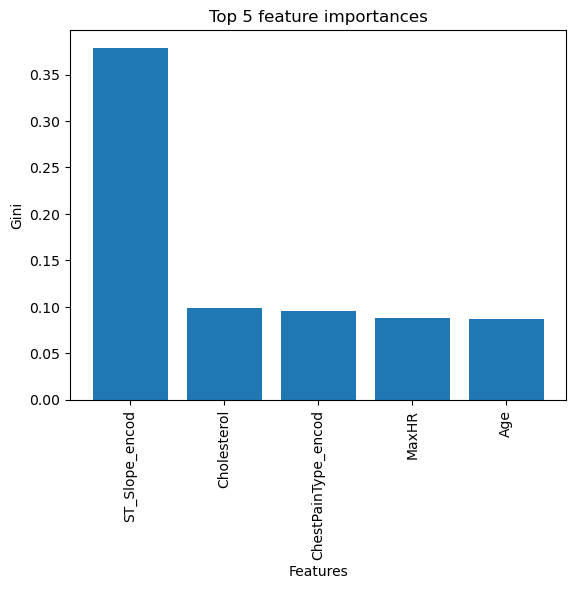

In [130]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.xticks(rotation = 90)
plt.show()

In [219]:
precision_random_tree = precision_score(y_test,rf.predict(X_test))
recall_random_tree = recall_score(y_test,rf.predict(X_test))
print(f"Точность на обучающей выборке - {rf.score(X_train,y_train):.2f}, точность на тестовой выборке - {rf.score(X_test,y_test):.2f}")
print(f"Precision - {precision_random_tree:.2f},recall - {recall_random_tree:.2f}")

Точность на обучающей выборке - 0.96, точность на тестовой выборке - 0.88
Precision - 0.95,recall - 0.84


## Bagging

In [173]:
from sklearn.ensemble import  BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=10, ## 10 разных деревьей
                           max_samples=0.5,
                           random_state=10,)
bagging.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.5,
                  random_state=10)

In [221]:
precision_bagging = precision_score(y_test,bagging.predict(X_test))
recall_bagging= recall_score(y_test,bagging.predict(X_test))
print(f"Точность на обучающей выборке - {bagging.score(X_train,y_train):.2f}, точность на тестовой выборке - {bagging.score(X_test,y_test):.5f}")
print(f"Precision - {precision_bagging:.2f},recall - {recall_bagging:.2f}")

Точность на обучающей выборке - 0.93, точность на тестовой выборке - 0.88043
Precision - 0.93,recall - 0.86


Модель показывает хорошую точность на тестовой выборке и на обучающей, причем, переобучение не выявлено. Точность такая же, как и в алгоритме случайного леса

## Stacking

In [198]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

stacking_classifer = StackingClassifier(
    [
        ('RandomForestClassifier', RandomForestClassifier(random_state=10,n_estimators=10,max_samples=0.7,max_features=0.7)),
        ('Support Vector Classification.C', SVC()),
        ('DecisionTree', DecisionTreeClassifier(random_state=10,max_depth=7))
    ], RidgeClassifier())

In [199]:
stacking_classifer.fit(X_train,y_train)

StackingClassifier(estimators=[('RandomForestClassifier',
                                RandomForestClassifier(max_features=0.7,
                                                       max_samples=0.7,
                                                       n_estimators=10,
                                                       random_state=10)),
                               ('Support Vector Classification.C', SVC()),
                               ('DecisionTree',
                                DecisionTreeClassifier(max_depth=7,
                                                       random_state=10))],
                   final_estimator=RidgeClassifier())

In [222]:
precision_stacking = precision_score(y_test,stacking_classifer.predict(X_test))
recall_stacking= recall_score(y_test,stacking_classifer.predict(X_test))
print(f"Точность на обучающей выборке - {stacking_classifer.score(X_train,y_train):.2f}, точность на тестовой выборке - {stacking_classifer.score(X_test,y_test):.5f}")
print(f"Precision - {precision_stacking:.2f},recall - {precision_stacking:.2f}")

Точность на обучающей выборке - 0.95, точность на тестовой выборке - 0.89130
Precision - 0.94,recall - 0.94


Точность предсказания на тестовой выборке повысилась существенно по сравнению с предыдущими алгоритмами

## Boosting

In [212]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(n_estimators=100,
                                     random_state=10,learning_rate=0.01,)
boosting.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=10)

In [223]:
precision_boosting = precision_score(y_test,stacking_classifer.predict(X_test))
recall_boosting= recall_score(y_test,stacking_classifer.predict(X_test))
print(f"Точность на обучающей выборке - {boosting.score(X_train,y_train):.2f}, точность на тестовой выборке - {boosting.score(X_test,y_test):.5f}")
print(f"Precision - {precision_boosting:.2f},recall - {recall_boosting:.2f}")

Точность на обучающей выборке - 0.88, точность на тестовой выборке - 0.87500
Precision - 0.94,recall - 0.87


Точность алгоритма градиентного бустинга немного ниже, стэкинга

Вывод: были рассмотрены 5 разных алгоритмов машинного обучения (Деревья решений, случайный лес, стэкинг, бэггинг, градиентный бустинг), 4 из которых относятся к ансамблевым методам. Самую высокую точность на тестовой выборе показал метод стэкинга - на одной и той же выработке обучились 3 алгоритма - деревья решений, случайный лес и метод опорных векторов для классификации, метамоделью  выступил алгоритм регуляризованной логистической регрессия для классификации (RedgeClassifer). Точность предсказания при данном метода составила 89%. Самую низкую точность предсказания показал алгоритм деревьев решений - 80%. Кроме того, для каждой модели были посчитаны метрики precision и recall, самой высокой метрикой recall обладает так же метод stacking - алгоритм ансамблирования отгадал 94% целевой переменной на тестовых значениях, самой низкой метрикой recall - деревья решений (78%). Таким образом, можно сделать вывод, что для данной задачи лучше всего подходит метод ансамблирования stacking